In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import pandas as pd
import datetime

%matplotlib inline

In [2]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2018,1,1)

In [3]:
tesla = web.DataReader("TSLA","iex",start,end,api_key="sk_d0a3bb5ac9534db88dc8b66079928549" )
ford = web.DataReader("F","iex",start,end,api_key="sk_d0a3bb5ac9534db88dc8b66079928549" )
gm = web.DataReader("GM","iex",start,end,api_key="sk_d0a3bb5ac9534db88dc8b66079928549" )

In [4]:
tesla.head()

,open,high,low,close,volume
date,,,,,
2012-01-03,1.9293,1.9667,1.8433,1.8720,13920780.0
2012-01-04,1.8807,1.9113,1.8333,1.8473,9450540.0
2012-01-05,1.8507,1.8620,1.7900,1.8080,15081480.0
2012-01-06,1.8133,1.8527,1.7607,1.7940,14794305.0
2012-01-09,1.8000,1.8327,1.7413,1.8167,13454265.0


In [5]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 2012-01-03 to 2017-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1516 non-null   float64
 1   high    1516 non-null   float64
 2   low     1516 non-null   float64
 3   close   1516 non-null   float64
 4   volume  1516 non-null   float64
dtypes: float64(5)
memory usage: 71.1+ KB


In [6]:
tesla.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

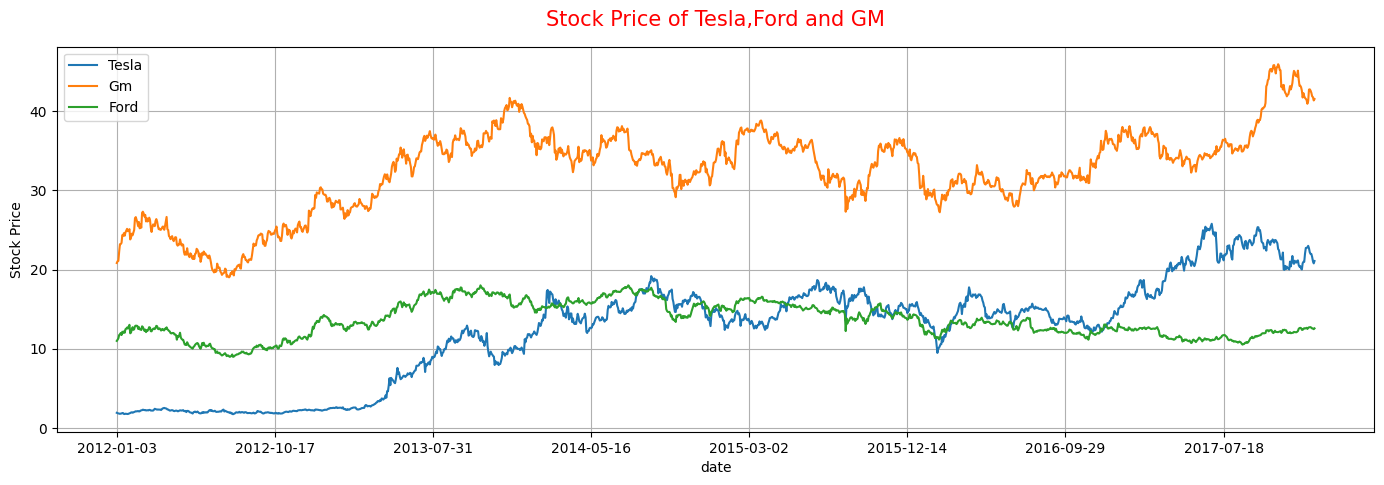

In [7]:
tesla["open"].plot(figsize=(17,5),label="Tesla")
gm["open"].plot(label="Gm")
ford["open"].plot(label="Ford")


font1 = {'family':'sans','color':'red','size':15}
plt.title("Stock Price of Tesla,Ford and GM",fontdict=font1,pad=(15))
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

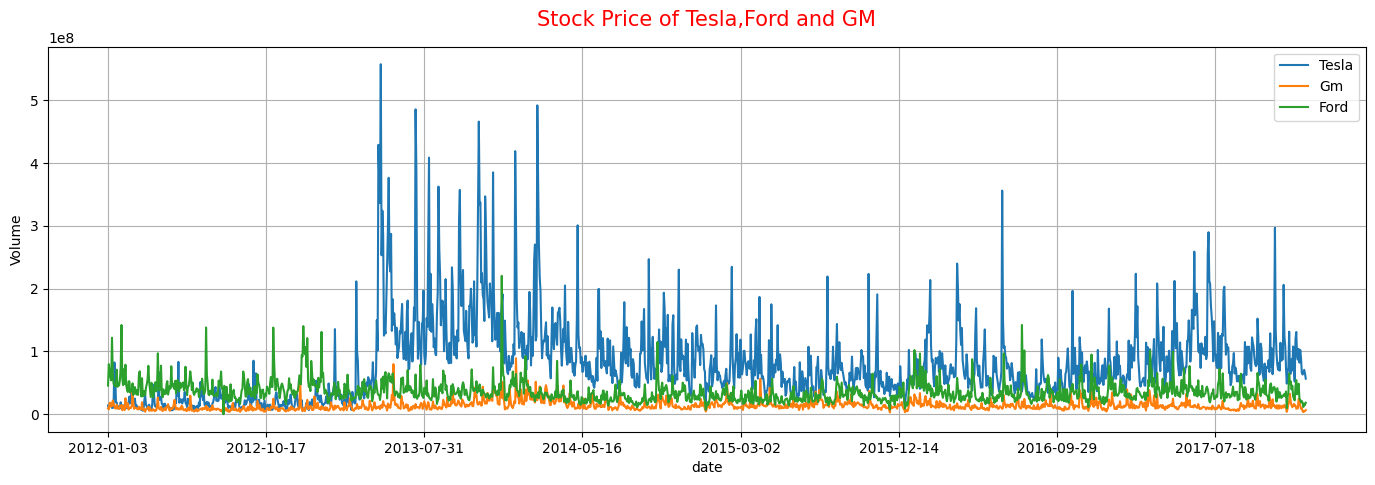

In [8]:
tesla["volume"].plot(figsize=(17,5),label="Tesla")
gm["volume"].plot(label="Gm")
ford["volume"].plot(label="Ford")


font1 = {'family':'sans','color':'red','size':15}
plt.title("Stock Price of Tesla,Ford and GM",fontdict=font1,pad=(15))
plt.ylabel("Volume")
plt.legend()
plt.grid()
plt.show()

In [9]:
ford.iloc[[ford["volume"].argmax()]]

,open,high,low,close,volume
date,,,,,
2013-12-18,15.99,16.0,15.17,15.65,220362796


In [10]:
tesla["total_trade"]= tesla["open"]*tesla["volume"]
tesla.head()

,open,high,low,close,volume,total_trade
date,,,,,,
2012-01-03,1.9293,1.9667,1.8433,1.8720,13920780.0,2.685736e+07
2012-01-04,1.8807,1.9113,1.8333,1.8473,9450540.0,1.777363e+07
2012-01-05,1.8507,1.8620,1.7900,1.8080,15081480.0,2.791130e+07
2012-01-06,1.8133,1.8527,1.7607,1.7940,14794305.0,2.682651e+07
2012-01-09,1.8000,1.8327,1.7413,1.8167,13454265.0,2.421768e+07


In [11]:
gm["total_trade"]= gm["open"]*gm["volume"]
gm.head()

,open,high,low,close,volume,total_trade
date,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08


In [12]:
ford["total_trade"]= ford["open"]*ford["volume"]
ford.head()

,open,high,low,close,volume,total_trade
date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08


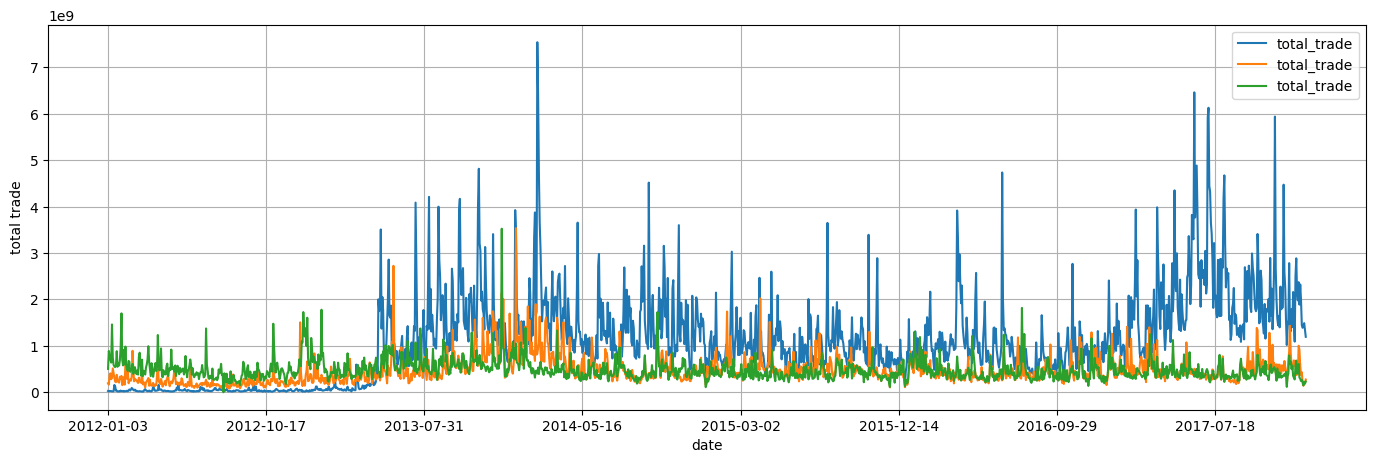

In [13]:
tesla["total_trade"].plot(figsize=(17,5))
gm["total_trade"].plot(figsize=(17,5))
ford["total_trade"].plot(figsize=(17,5))

plt.ylabel("total trade")
plt.legend()
plt.grid()
plt.show()


In [14]:
tesla.iloc[[tesla["total_trade"].argmax()]]

,open,high,low,close,volume,total_trade
date,,,,,,
2014-02-25,15.3333,17.28,15.23,16.5333,491955000.0,7.543294e+09


## **`Moving Average`** 

### `WHAT IS MOVING AVERAGE?`

- Moving Average is a `technical indicator` where average of `previous` prices are taken to compare with the `current` price.

- The two basic and commonly used moving averages are the **`Simple Moving Average (SMA)`**
and **`Exponential Moving Average (EMA)`**

- `SMA` is the arithmetic average of a security over a defined number of time periods

- `EMA` gives greater weight to more recent prices.

- `Moving average` is a `Trend-Following` and `Lagging` indicator because it is based on `past prices`.

#### `Application:`
 - to identity the `trend direction`
 - to determine `support` and `resistance levels`.


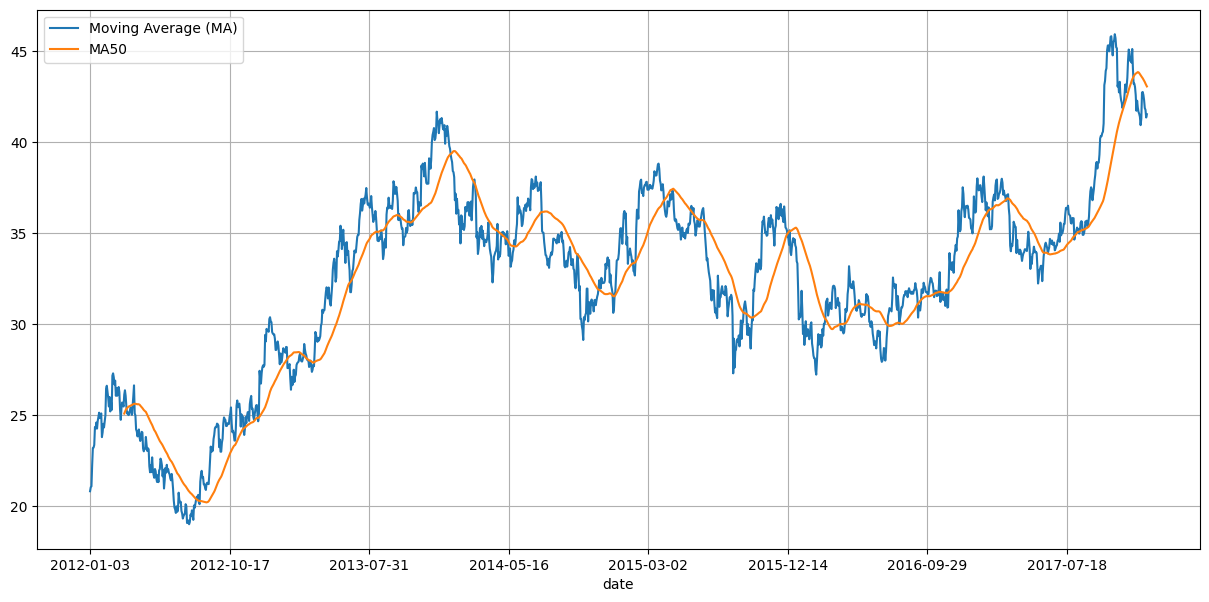

In [15]:
gm['open'].plot(figsize=(15,7),label="Moving Average (MA)")
gm['MA50']=gm["close"].rolling(50).mean()
gm['MA50'].plot()

plt.legend()
plt.grid()
plt.show()

### **`LONG TERM APPLICATION`**
- 200 SMA Base
- C50 SMA, 200 SMA Cross Over Strategy
- 13 SMA, 48 SMA Cross Over Strategy

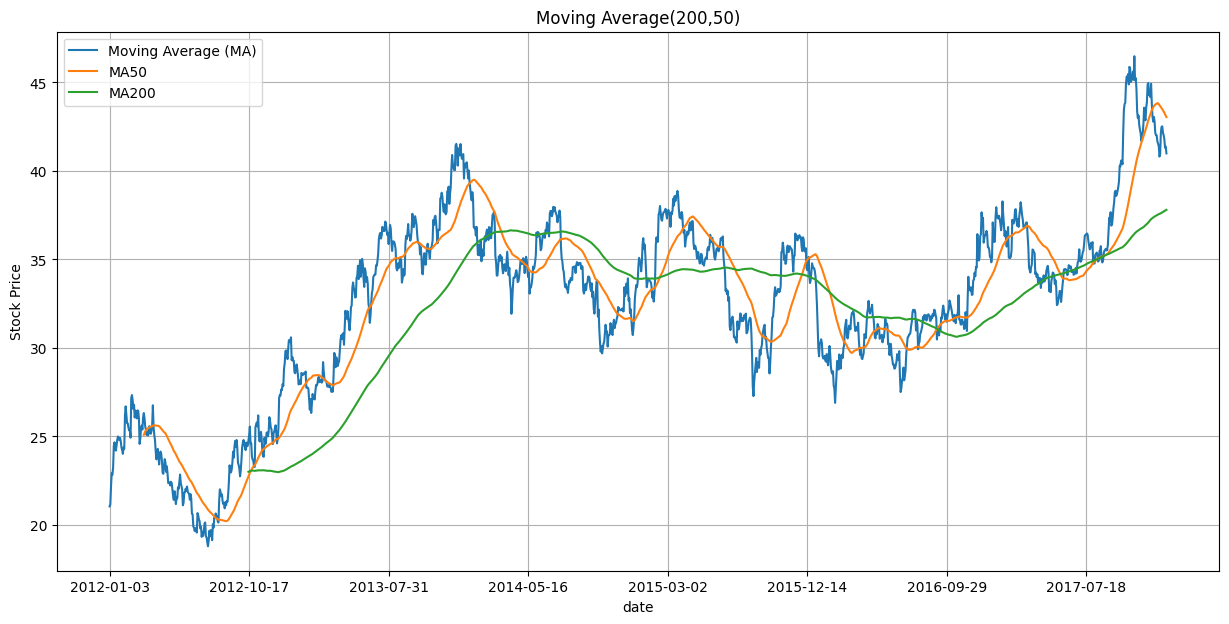

In [16]:
gm["close"].plot(figsize=(15,7),label="Moving Average (MA)")
gm['MA200'] = gm['close'].rolling(200).mean()
gm['MA13'] = gm['close'].rolling(13).mean()
gm['MA48'] = gm['close'].rolling(13).mean()


gm['MA50'].plot()
gm['MA200'].plot()




plt.title("Moving Average(200,50)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


In [17]:
from pandas.plotting import scatter_matrix
car_comp = pd.concat([tesla["open"],gm["open"],ford["open"]],axis=1)
car_comp.columns = ["Tesla Open","Gm Open","Ford Open"]

array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Gm Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Gm Open'>,
        <Axes: xlabel='Gm Open', ylabel='Gm Open'>,
        <Axes: xlabel='Ford Open', ylabel='Gm Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Ford Open'>,
        <Axes: xlabel='Gm Open', ylabel='Ford Open'>,
        <Axes: xlabel='Ford Open', ylabel='Ford Open'>]], dtype=object)

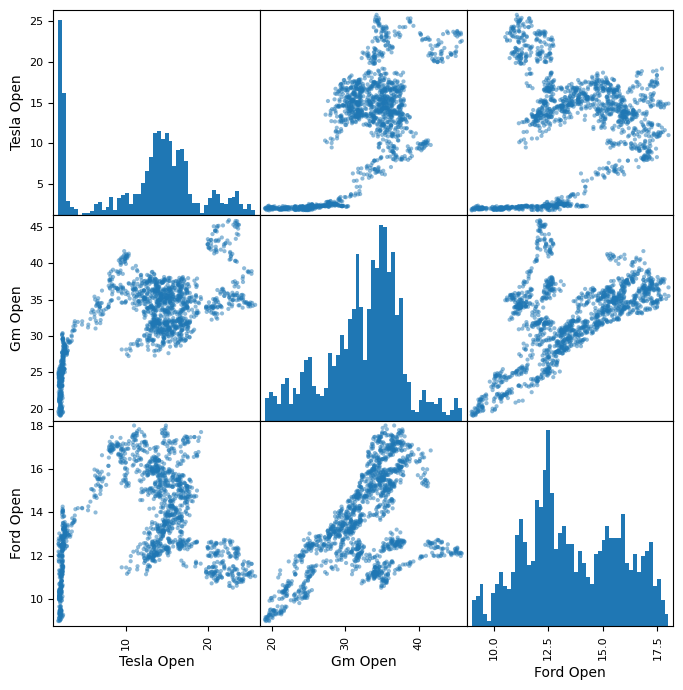

In [18]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={"bins":50})

In [19]:
import plotly.graph_objects as go
import mplfinance as fplt

from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,MONDAY,DayLocator

In [20]:

# ford["date"] = pd.to_datetime(ford["date"])

fig = go.Figure(data=[go.Candlestick(x=ford.index,
                open=ford['open'],
                high=ford['high'],
                low=ford['low'],
                close=ford['close'])])

ford["date"] = pd.to_datetime(ford.index)
ford.index = pd.to_datetime(ford.index)


fig.show()

In [21]:
ford.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='date', length=1516, freq=None)

### **`Daily Percentage Change`**

${r_t} = {\frac{p_t}{p_t - 1} -1 }$


In [22]:
tesla["returns"] = (tesla["close"]/tesla["close"].shift(1)) -1
gm["returns"] = (gm["close"]/gm["close"].shift(1)) -1
ford["returns"] = (ford["close"]/ford["close"].shift(1)) -1



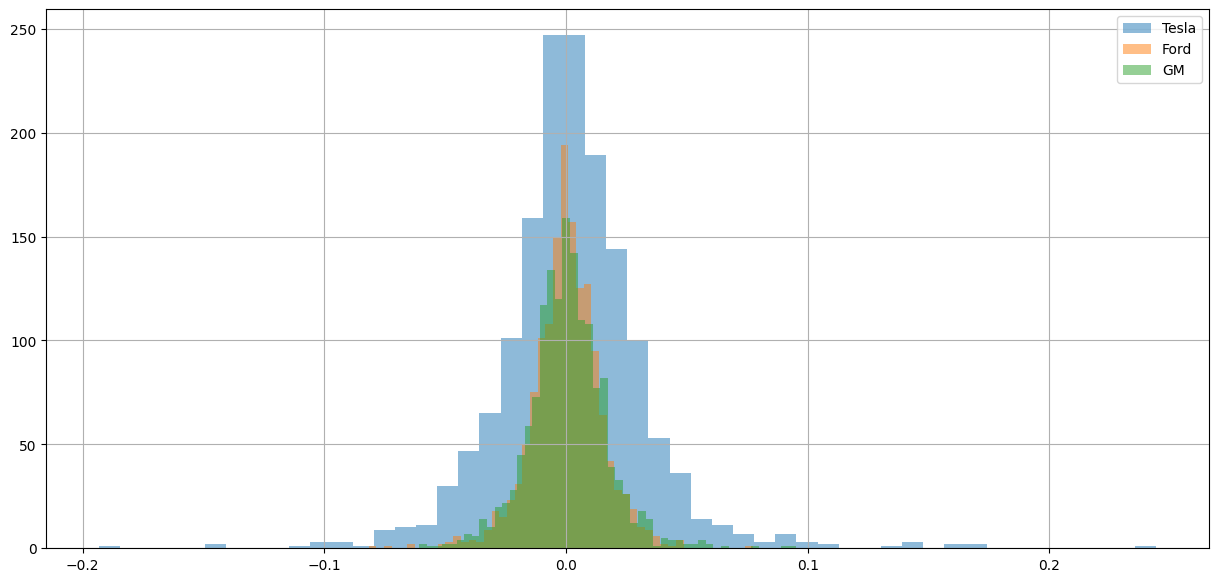

In [23]:
tesla["returns"].hist(bins=50,label="Tesla",figsize=(15,7),alpha=.5)
ford["returns"].hist(bins=50,label="Ford",alpha=.5)
gm["returns"].hist(bins=50,label="GM",alpha=.5)


plt.legend()

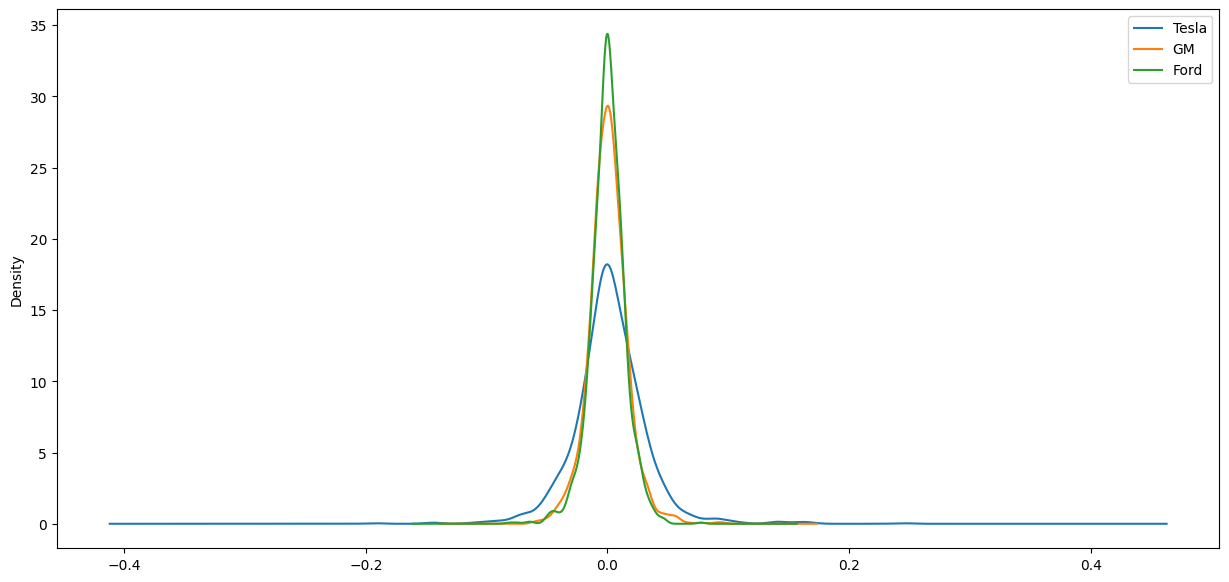

In [24]:
tesla["returns"].plot(kind="kde",label="Tesla",figsize=(15,7))
gm["returns"].plot(kind="kde",label="GM")
ford["returns"].plot(kind="kde",label="Ford")

plt.legend()
plt.show()



<Axes: >

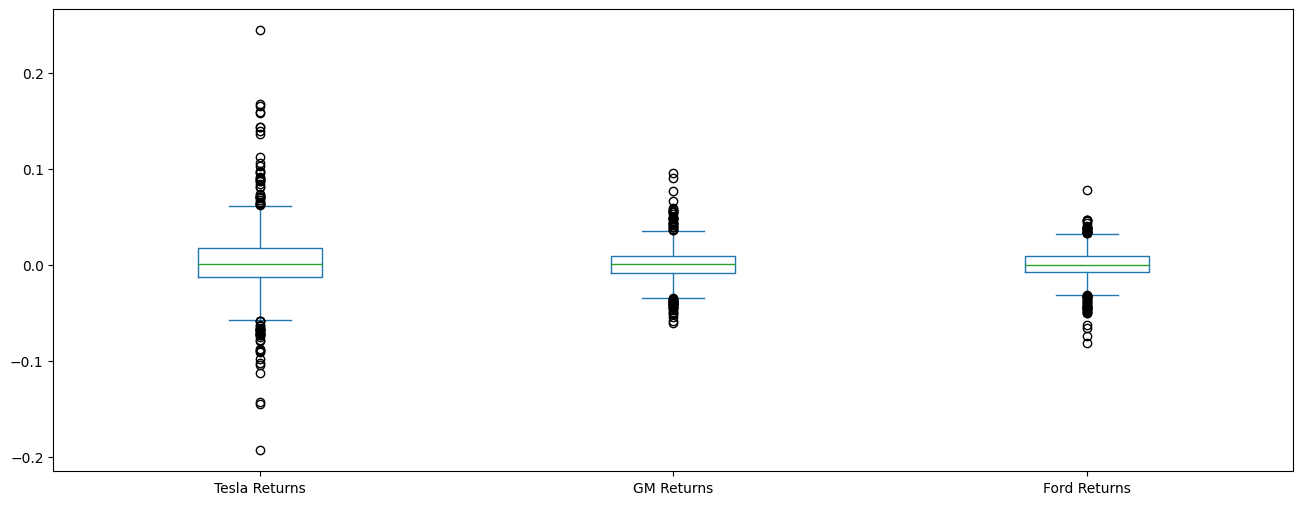

In [25]:
box_df = pd.concat([tesla["returns"],gm["returns"],ford["returns"]],axis=1)
box_df.columns= ["Tesla Returns","GM Returns","Ford Returns"]

box_df.plot(kind="box",figsize=(16,6))

array([[<Axes: xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <Axes: xlabel='GM Returns', ylabel='Tesla Returns'>,
        <Axes: xlabel='Ford Returns', ylabel='Tesla Returns'>],
       [<Axes: xlabel='Tesla Returns', ylabel='GM Returns'>,
        <Axes: xlabel='GM Returns', ylabel='GM Returns'>,
        <Axes: xlabel='Ford Returns', ylabel='GM Returns'>],
       [<Axes: xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <Axes: xlabel='GM Returns', ylabel='Ford Returns'>,
        <Axes: xlabel='Ford Returns', ylabel='Ford Returns'>]],
      dtype=object)

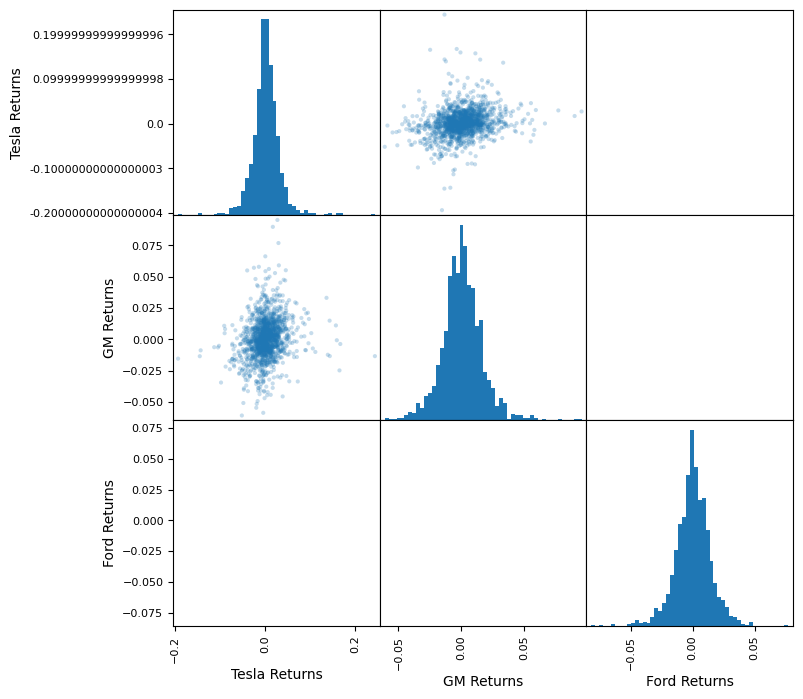

In [26]:
scatter_matrix(box_df,hist_kwds={"bins":50},figsize=(8,8),alpha=.25)

### **`Cumulative Return`**

In [41]:
tesla["cumulative_return"] = (1+ tesla["returns"]).cumprod()
gm["cumulative_return"] = (1+ gm["returns"]).cumprod()
ford["cumulative_return"] = (1+ ford["returns"]).cumprod()


ford.head()

,open,high,low,close,volume,total_trade,date,returns,cumulative_return
date,,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,2012-01-03,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,2012-01-04,0.015274,1.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,2012-01-05,0.025664,1.041330
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,2012-01-06,0.010354,1.052111
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,2012-01-09,0.007686,1.060198


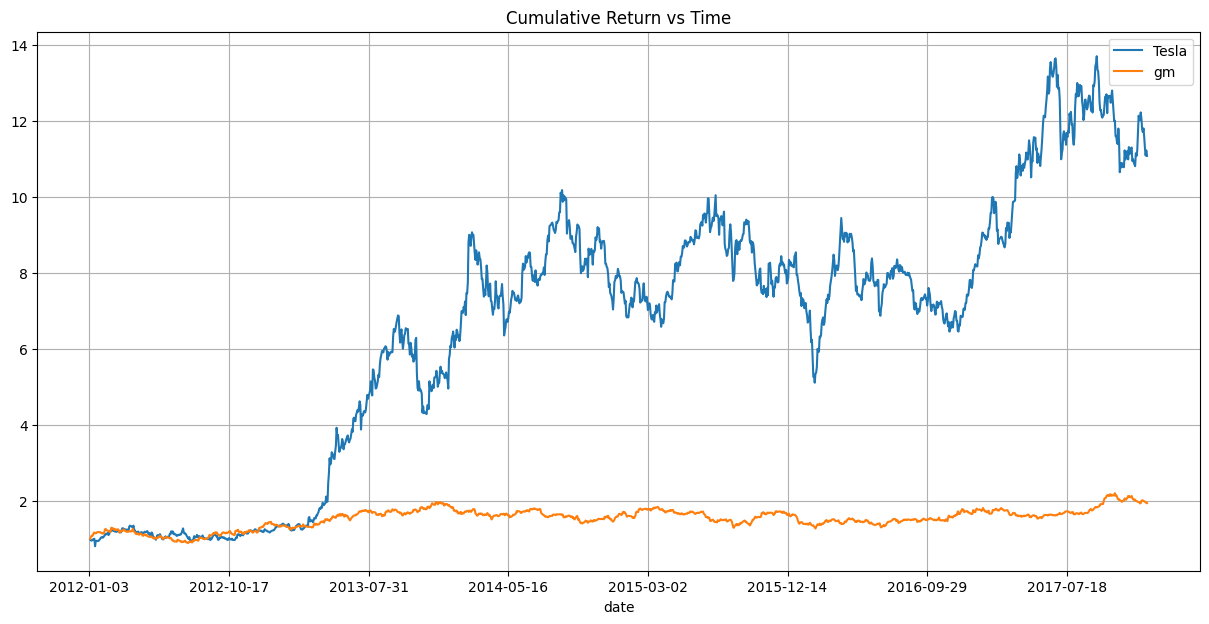

In [40]:
tesla["cumulative_return"].plot(label = "Tesla",figsize=(15,7))
# ford["cumulative_return"].plot(label = "Ford",)
gm["cumulative_return"].plot(label = "gm",)


plt.title("Cumulative Return vs Time")
plt.grid()
plt.legend()
plt.show()
